In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("data/titanic/train.csv")
test_df = pd.read_csv("data/titanic/test.csv")

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Première partie : Prise en main du dataset

survival Survival 	0 = No, 1 = Yes   
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd  
Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

# PassengerID

[]

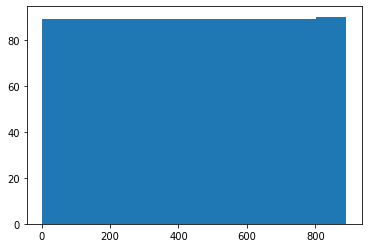

In [7]:
plt.hist(train_df["PassengerId"])
plt.plot()

Les données concernant l'id des passagers est trop éparpillé et donc inutilisable. Je peux la supprimer

In [8]:
def drop(feature, train_df, test_df):
    train_df.drop(feature, axis = 1, inplace = True)
    test_df.drop(feature, axis = 1, inplace = True)

In [9]:
drop("PassengerId", train_df, test_df)

# Survival
Booléen 1 si survécu

In [10]:
# Passé la variable en string permet d'éviter d'avoir l'axe des x pollués par des valeurs intermédiaires
train_df["Survived"] = train_df["Survived"].astype("string")

In [11]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: Int64

In [12]:
train_df["Survived"].value_counts().index.tolist()

['0', '1']

<BarContainer object of 2 artists>

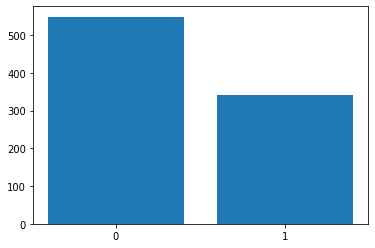

In [13]:
plt.bar(train_df["Survived"].value_counts().index.tolist(),
        train_df["Survived"].value_counts())

En regardant les informations affichés, on voit qu'il y une majorité de personne qui n'ont pas survécu dans l'accident. L'objectif va être de trouver une concordance entre les personnes décédés et leurs caractéristiques

# Pclass

Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd 

In [14]:
train_df["Pclass"] = train_df["Pclass"].astype("string")

In [15]:
Pclass = train_df["Pclass"].value_counts()
print(Pclass)

3    491
1    216
2    184
Name: Pclass, dtype: Int64


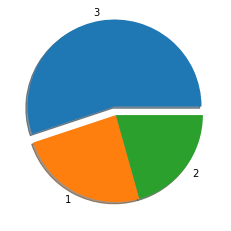

In [16]:
fig, ax = plt.subplots()
ax.pie(Pclass, explode = [0.1, 0, 0], labels = Pclass.index.tolist(), shadow = True)

plt.show()

<BarContainer object of 3 artists>

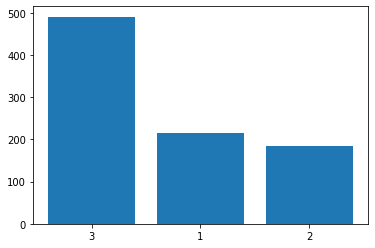

In [17]:
plt.bar(train_df["Pclass"].value_counts().index.tolist(),
        train_df["Pclass"].value_counts())

En regardant les données, je vois bien qu'il y une différence de nombre de personne significatife entre la troisième classe et la première et la deuxième classe.

Maintenant, l'idée c'est de voir si le niveau de la classe est lié à la survie

<AxesSubplot:xlabel='Pclass', ylabel='count'>

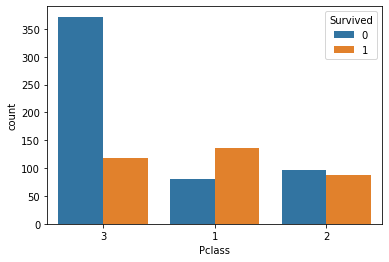

In [18]:
sns.countplot(x = "Pclass", hue = "Survived", data = train_df)

Selon moi, je peux transformer la classe 1 et 2 en unique classe. Les données concordent ensemble

In [19]:
def PClass_fusion(Pclass):
    if Pclass == "1" or Pclass == "2":
        return "1_2"
    else:
        return "3"
    
train_df["Pclass"] = train_df["Pclass"].apply(PClass_fusion)

In [20]:
train_df["Pclass"]

0        3
1      1_2
2        3
3      1_2
4        3
      ... 
886    1_2
887    1_2
888      3
889    1_2
890      3
Name: Pclass, Length: 891, dtype: object

<AxesSubplot:xlabel='Pclass', ylabel='count'>

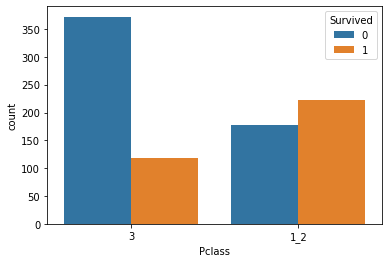

In [21]:
sns.countplot(x = "Pclass", hue = "Survived", data = train_df)

Ce que cela montre, c'est que être en troisième classe etait significative du décès mais que être en deuxième ou en troisième ne voulait rien dire. Il faut continuer les analyses pour voir les meilleurs features

# Name

Les noms sont rarement des données exploitables, autant les drop

In [22]:
drop("Name", train_df, test_df)

# Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

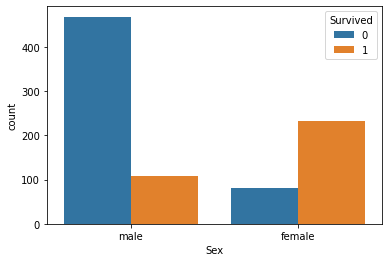

In [23]:
sns.countplot(x = "Sex", hue = "Survived", data = train_df)

Clairement, il faut garder le Sex, les hommes ont eu moins de chance que les femmes

# Age

In [24]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())

In [25]:
def age_category(age):
    if age < 16:
        return "Child"
    elif age < 35 :
        return "Young Adult"
    elif age < 60 :
        return "Adult"
    else:
        return "Old people"
    
train_df["Age"] = train_df["Age"].apply(age_category)

<AxesSubplot:xlabel='Age', ylabel='count'>

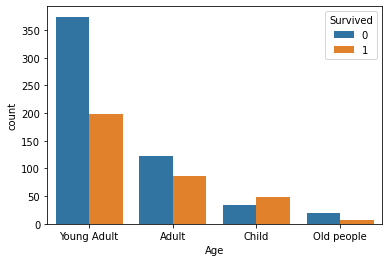

In [26]:
sns.countplot(x = "Age", hue = "Survived", data = train_df)

# SibSp 	
nb of siblings / spouses aboard the Titanic 	

[]

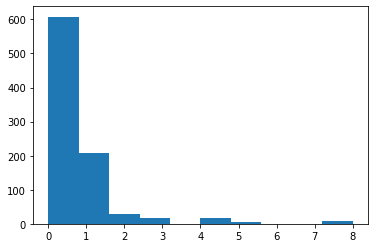

In [27]:
plt.hist(train_df["SibSp"])
plt.plot()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

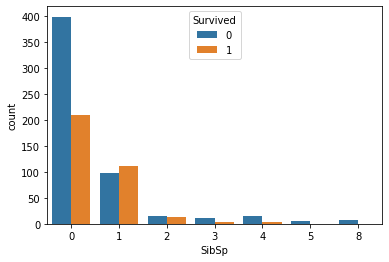

In [28]:
sns.countplot(x = "SibSp", hue = "Survived", data = train_df)

Les données me sembles être peu informatives, il faudrait combiner les colonnes comme pour la classe parce que là, les classes au dessus de 2 ne vont être que du bruit

In [29]:
def SibSp_fusion(Pclass):
    if Pclass == 0:
        return "0"
    else:
        return ">=1"
    
train_df["SibSp"] = train_df["SibSp"].apply(SibSp_fusion)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

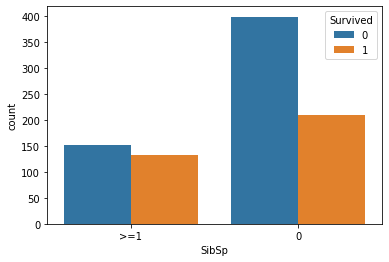

In [30]:
sns.countplot(x = "SibSp", hue = "Survived", data = train_df)

Dans la même veine que pour le niveau de la classe, je peux garder cette information

# Parch 	
nb of parents / children aboard the Titanic 	

[]

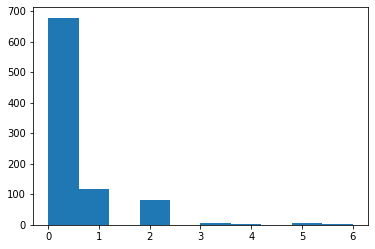

In [31]:
plt.hist(train_df["Parch"])
plt.plot()

<AxesSubplot:xlabel='Parch', ylabel='count'>

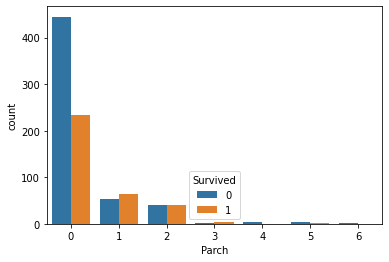

In [32]:
sns.countplot(x = "Parch", hue = "Survived", data = train_df)

Même process que pour les siblings

In [33]:
def Parch_fusion(Pclass):
    if Pclass == 0:
        return "0"
    else:
        return ">=1"
    
train_df["Parch"] = train_df["Parch"].apply(Parch_fusion)

<AxesSubplot:xlabel='Parch', ylabel='count'>

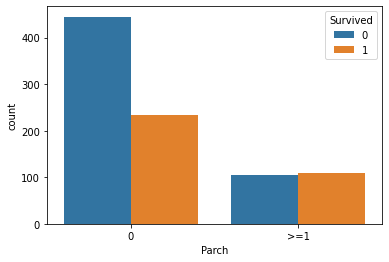

In [34]:
sns.countplot(x = "Parch", hue = "Survived", data = train_df)

# Ticket 	
Ticket number

[]

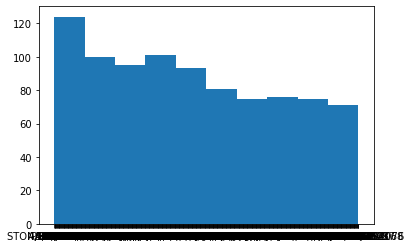

In [35]:
plt.hist(train_df["Ticket"])
plt.plot()

In [36]:
drop("Ticket", train_df, test_df)

# Fare
Passenger fare (tarif)

[]

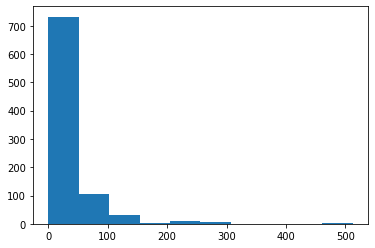

In [37]:
plt.hist(train_df["Fare"])
plt.plot()

<AxesSubplot:xlabel='Fare', ylabel='count'>

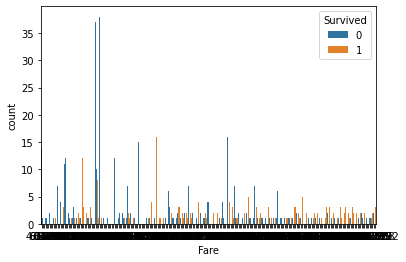

In [38]:
sns.countplot(x = "Fare", hue = "Survived", data = train_df)

In [39]:
train_df["Fare"].mean()

32.204207968574636

In [40]:
train_df["Fare"].median()

14.4542

<AxesSubplot:xlabel='Fare', ylabel='count'>

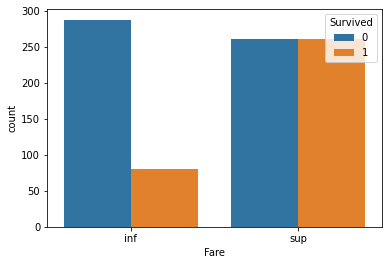

In [41]:
def Fare_fusion(x, mid_value = train_df["Fare"].median()-3):
    if x <= mid_value:
        return "inf"
    else:
        return "sup"
    
train_df["Fare"] = train_df["Fare"].apply(Fare_fusion)
sns.countplot(x = "Fare", hue = "Survived", data = train_df)

# Cabin
Cabin number

Quand on regarde le tableau en haut, il manque énormément de données

[]

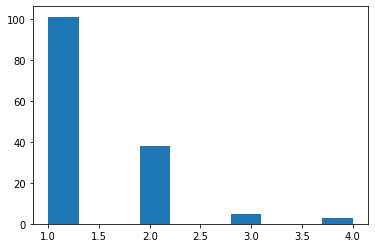

In [42]:
plt.hist(train_df["Cabin"].value_counts())
plt.plot()

In [43]:
print(train_df["Cabin"])

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object


In [44]:
drop("Cabin", train_df, test_df)

# Embarked
Port of Embarkation 	
C = Cherbourg, Q = Queenstown, S = Southampton

<AxesSubplot:xlabel='Embarked', ylabel='count'>

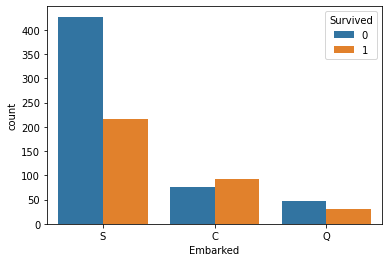

In [45]:
sns.countplot(x = "Embarked", hue = "Survived", data = train_df)

In [46]:
def Embarked_fusion(x):
    if x == "C" or x == "O":
        return "1_2"
    else:
        return "3"
    
train_df["Embarked"] = train_df["Embarked"].apply(Embarked_fusion)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

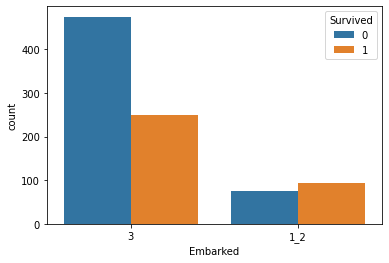

In [47]:
sns.countplot(x = "Embarked", hue = "Survived", data = train_df)

In [48]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,Young Adult,>=1,0,inf,3
1,1,1_2,female,Adult,>=1,0,sup,1_2
2,1,3,female,Young Adult,0,0,inf,3
3,1,1_2,female,Adult,>=1,0,sup,3
4,0,3,male,Adult,0,0,inf,3


In [49]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [50]:
y = train_df[["Survived"]]

train_df.drop("Survived", axis = 1, inplace = True)

In [51]:
X = train_df
# X_test = test_df

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [57]:
X["Pclass"] = le.fit_transform(X["Pclass"])
X["Sex"] = le.fit_transform(X["Sex"])
X["Age"] = le.fit_transform(X["Age"])
X["SibSp"] = le.fit_transform(X["SibSp"])
X["Parch"] = le.fit_transform(X["Parch"])
X["Fare"] = le.fit_transform(X["Fare"])
X["Embarked"] = le.fit_transform(X["Embarked"])

In [58]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,3,1,0,0,1
1,0,0,0,1,0,1,0
2,1,0,3,0,0,0,1
3,0,0,0,1,0,1,1
4,1,1,0,0,0,0,1


# Apprentissage

Pour un premier test, je vais produire deux algorithmes. Une régression logistique et un arbre de décision et compararé les résultats

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

In [61]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [66]:
# model = tree.DecisionTreeClassifier()
model = LogisticRegression()

In [67]:
model = model.fit(X_train, y_train)

/home/baptiste/Applications/Env/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
model.score(X_test, y_test)

0.7694915254237288